In [52]:
#1. Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [8]:
#2. Load data
df=pd.read_excel('nih-Worldwide2015.xls')
print(df.head())
print(df.dtypes)

                      Organization Name       Project Number  \
0       21ST CENTURY THERAPEUTICS, INC.      5R43GM109528-02   
1       21ST CENTURY THERAPEUTICS, INC.    1R43AT008202-01A1   
2                 2B TECHNOLOGIES, INC.      2R44ES024031-02   
3  3-C INSTITUTE FOR SOCIAL DEVELOPMENT  271201400075C-1-0-0   
4  3-C INSTITUTE FOR SOCIAL DEVELOPMENT      2R44DA035014-02   

  Funding Mechanism  NIH Reference                 PI Name  \
0  RPGs - SBIR/STTR        8860204           SHAW, JIAJIU    
1  RPGs - SBIR/STTR        8832837            CHEN, BEN D.   
2  RPGs - SBIR/STTR        8977721           BIRKS, JOHN W   
3     R&D Contracts        9041442       SANCHEZ, REBECCA    
4  RPGs - SBIR/STTR        8981102  MCMILLEN, JANEY STURTZ   

                                       Project Title DEPT NAME  \
0  Development of a Novel ELISA Kit for Screening...       NaN   
1  Novel Compounds from Sycamore Leaves for the T...       NaN   
2  Personal Exposure Monitoring of the Air P

In [9]:
#3. Medical school
mschool=df[df['Attributed to Medical School']=='Y']
print(mschool)

            Organization Name     Project Number      Funding Mechanism  \
231    ALBANY MEDICAL COLLEGE    5R01HL110951-04   RPGs - Non SBIR/STTR   
232    ALBANY MEDICAL COLLEGE  1R01HL122865-01A1   RPGs - Non SBIR/STTR   
233    ALBANY MEDICAL COLLEGE  2R01GM051540-17A1   RPGs - Non SBIR/STTR   
234    ALBANY MEDICAL COLLEGE    7R21AI109410-02   RPGs - Non SBIR/STTR   
236    ALBANY MEDICAL COLLEGE  1R01HL121700-01A1   RPGs - Non SBIR/STTR   
...                       ...                ...                    ...   
52204         YALE UNIVERSITY    5F31CA174324-02  Training - Individual   
52205         YALE UNIVERSITY    5R01GM022854-40   RPGs - Non SBIR/STTR   
52206         YALE UNIVERSITY    5R01GM098498-03   RPGs - Non SBIR/STTR   
52207         YALE UNIVERSITY  3P50AA012870-15S1       Research Centers   
52208         YALE UNIVERSITY  1R21AI112810-01A1   RPGs - Non SBIR/STTR   

       NIH Reference             PI Name  \
231          8775252       TANG, DALE D.   
232        

In [10]:
#Parse activity and institution codes
def activity(x):
    activity_code=x[1:4]
    return activity_code
df['code']=df['Project Number'].apply(activity)

def institution(x):
    icode=x[4:6]
    return icode
df['icode']=df['Project Number'].apply(institution)
print(df)

                          Organization Name       Project Number  \
0           21ST CENTURY THERAPEUTICS, INC.      5R43GM109528-02   
1           21ST CENTURY THERAPEUTICS, INC.    1R43AT008202-01A1   
2                     2B TECHNOLOGIES, INC.      2R44ES024031-02   
3      3-C INSTITUTE FOR SOCIAL DEVELOPMENT  271201400075C-1-0-0   
4      3-C INSTITUTE FOR SOCIAL DEVELOPMENT      2R44DA035014-02   
...                                     ...                  ...   
52229                          ZETROZ, INC.      2R44MD008597-03   
52230                  ZONEONE PHARMA, INC.      1R41CA192689-01   
52231                  ZONEONE PHARMA, INC.      2R44HD075429-02   
52232                          ZUCHEM, INC.      5R44GM100638-03   
52233                          ZUCHEM, INC.      2R44GM106459-02   

      Funding Mechanism  NIH Reference                 PI Name  \
0      RPGs - SBIR/STTR        8860204           SHAW, JIAJIU    
1      RPGs - SBIR/STTR        8832837            C

In [11]:
#5. Keep only records where the activity code starts with a letter in the English alphabet.
df=df[df['code'].str[0].str.isalpha()]
print(df)

                          Organization Name     Project Number  \
0           21ST CENTURY THERAPEUTICS, INC.    5R43GM109528-02   
1           21ST CENTURY THERAPEUTICS, INC.  1R43AT008202-01A1   
2                     2B TECHNOLOGIES, INC.    2R44ES024031-02   
4      3-C INSTITUTE FOR SOCIAL DEVELOPMENT    2R44DA035014-02   
5      3-C INSTITUTE FOR SOCIAL DEVELOPMENT    5R44MD007143-03   
...                                     ...                ...   
52229                          ZETROZ, INC.    2R44MD008597-03   
52230                  ZONEONE PHARMA, INC.    1R41CA192689-01   
52231                  ZONEONE PHARMA, INC.    2R44HD075429-02   
52232                          ZUCHEM, INC.    5R44GM100638-03   
52233                          ZUCHEM, INC.    2R44GM106459-02   

      Funding Mechanism  NIH Reference                 PI Name  \
0      RPGs - SBIR/STTR        8860204           SHAW, JIAJIU    
1      RPGs - SBIR/STTR        8832837            CHEN, BEN D.   
2      RP

In [12]:
#6. Find the 10 NIH institutes that gave the most funding. 
most_funding=df.groupby('icode')['Funding'].sum()
most_funding.sort_values(ascending=False).head(10)

icode
CA    3067378774
AI    2816658845
GM    2305153448
HL    2275682842
DK    1594835858
NS    1339911506
MH    1161677004
AG     999538398
HD     971449006
DA     832033498
Name: Funding, dtype: int64

In [14]:
#7. Find the 10 Principal Investigators with the most number of grants. 
df['PI Name'].value_counts().head(10)

PI Name
WOODLAND, DAVID L.       42
STEWART, DAVID J.        30
KAPLAN, DAVID L          12
CALIGIURI, MICHAEL A.    10
WANG, TIMOTHY CRAGIN     10
SHARPLESS, NORMAN E      10
SNYDER, MICHAEL P         9
REZNIKOFF, WILLIAM S.     9
ADAMSON, PETER C.         9
BRADY, KATHLEEN T.        9
Name: count, dtype: int64

In [18]:
#8. Find the 10 organizations that have obtained the most diverse type of funding mechanisms. 
diverse_funding=df.groupby('Organization Name')['code'].nunique()
diverse_funding.sort_values(ascending=False).head(10)

Organization Name
UNIVERSITY OF WASHINGTON                  58
EMORY UNIVERSITY                          54
WASHINGTON UNIVERSITY                     53
UNIVERSITY OF CALIFORNIA LOS ANGELES      53
UNIVERSITY OF MICHIGAN                    53
UNIVERSITY OF PITTSBURGH AT PITTSBURGH    53
UNIV OF NORTH CAROLINA CHAPEL HILL        52
UNIVERSITY OF PENNSYLVANIA                52
JOHNS HOPKINS UNIVERSITY                  52
DUKE UNIVERSITY                           52
Name: code, dtype: int64

In [43]:
#9. Total funding and average funding given per each state/country.
funding_state=df.groupby('State or Country Name')['Funding'].agg(['sum','mean'])
funding_state

,sum,mean
State or Country Name,,
ALABAMA,258212374,456205.607774
ALASKA,13530884,751715.777778
ARGENTINA,832633,118947.571429
ARIZONA,150372947,382628.363868
ARKANSAS,40322657,443106.120879
...,...,...
WEST VIRGINIA,20974749,355504.220339
WISCONSIN,400636646,442692.426519
WYOMING,10459943,615290.764706


In [44]:
#10.merge US State
dfUS=pd.read_csv('us-states.csv', header=None,names=['State','ST'])
dfUS['State']=dfUS['State'].str.upper()
dfUS['State']=dfUS['State'].str.replace(', US','')
dfJoin=pd.merge(funding_state,dfUS, left_on='State or Country Name', right_on='State', how='inner')
dfJoin

,sum,mean,State,ST
0,258212374,456205.607774,ALABAMA,AL
1,13530884,751715.777778,ALASKA,AK
2,150372947,382628.363868,ARIZONA,AZ
3,40322657,443106.120879,ARKANSAS,AR
4,3401211113,450849.829401,CALIFORNIA,CA
5,322683622,352274.696507,COLORADO,CO
6,457563784,413336.751581,CONNECTICUT,CT
7,36448281,499291.520548,DELAWARE,DE
8,520183820,473755.755920,FLORIDA,FL
9,481481800,419774.891020,GEORGIA,GA


<Axes: xlabel='ST', ylabel='sum'>

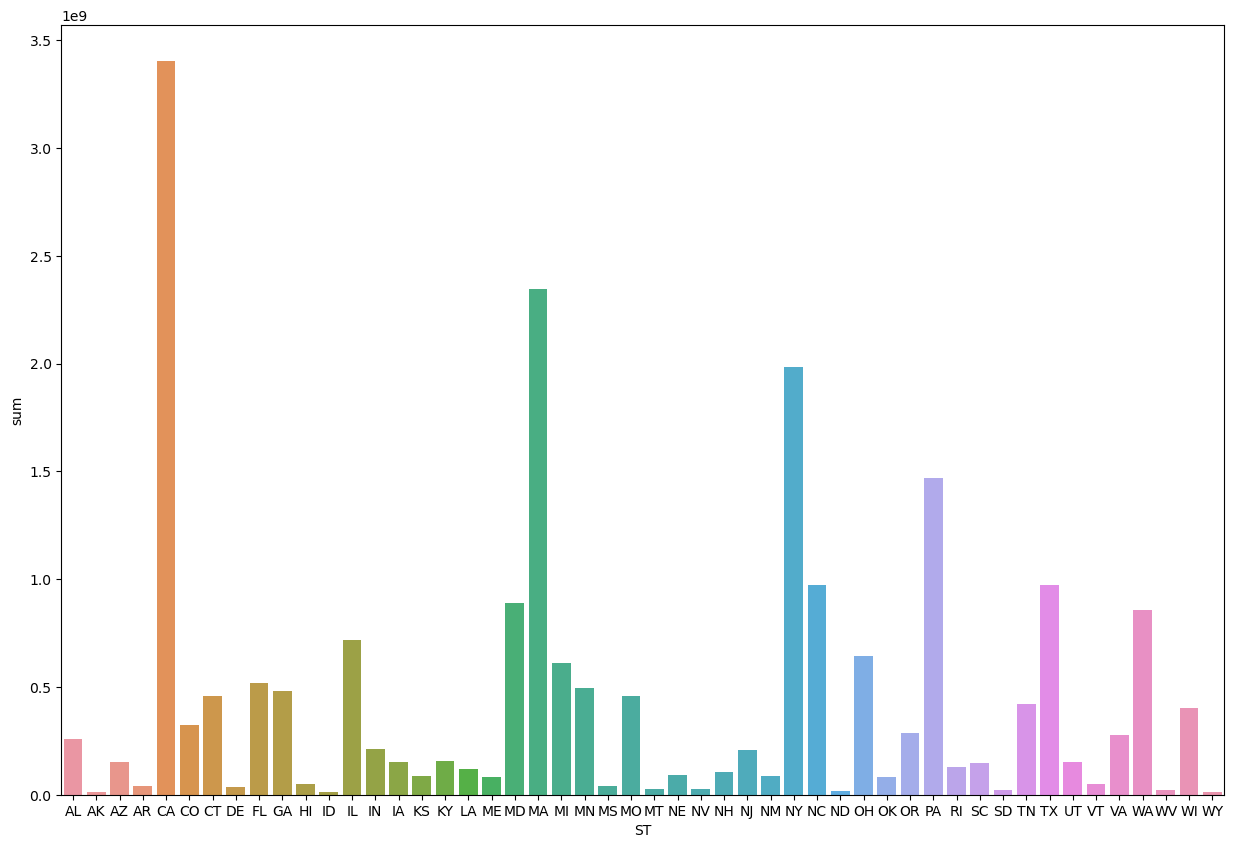

In [65]:
#11. bar plot
fid, ax=plt.subplots(figsize=(15,10))
sns.barplot(x='ST',y='sum',data=dfJoin)

In [71]:
#12.  Load the ‘papers.csv’ file to a DataFrame. 
paper=pd.read_csv('papers.csv')
merge_paper=pd.merge(df,paper, on='Project Number', how='right')
paper_funding=merge_paper[['Project Number','year','papersNum','Funding']]
paper_funding

,Project Number,year,papersNum,Funding
0,5R01NS082746-03,3,3,318529
1,5R01AI041576-18,18,0,399221
2,5R01EY025102-02,2,0,189262
3,3R01CA166588-04S1,4,0,78917
4,5R01CA158598-04,4,0,544193
...,...,...,...,...
4995,5R01GM107287-02,2,0,325070
4996,2R01AA019443-06A1,6,0,360521
4997,5R01DC001919-23,23,0,350274
4998,3R01HL110068-03S1,3,0,46905


<Axes: xlabel='Funding', ylabel='papersNum'>

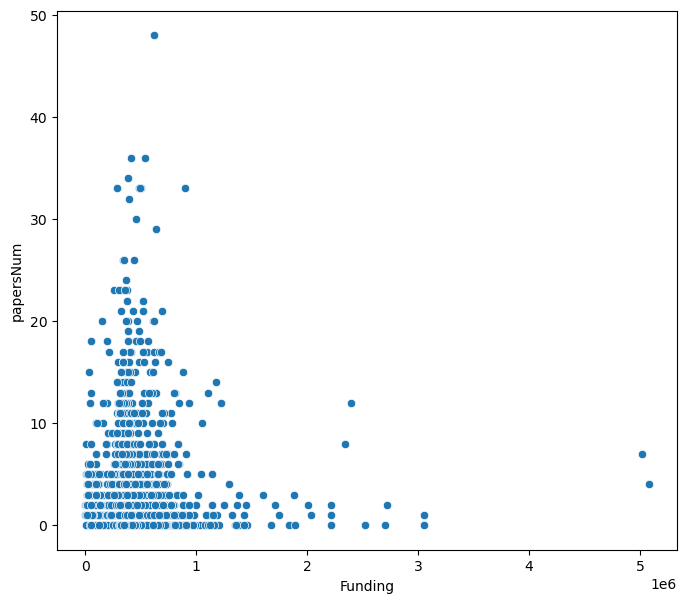

In [78]:
#13. scatter plt
fid, ax=plt.subplots(figsize=(8,7))
sns.scatterplot(x='Funding',y='papersNum',data=paper_funding)

In [79]:
#14.linear regression
data_reg=paper_funding[['year','Funding','papersNum']]
data_reg=sm.add_constant(data_reg)
lsmod=sm.OLS(data_reg['papersNum'],data_reg[['const','year','Funding']]).fit()
lsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              papersNum   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     16.45
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           7.54e-08
Time:                        15:47:30   Log-Likelihood:                -13145.
No. Observations:                5000   AIC:                         2.630e+04
Df Residuals:                    4997   BIC:                         2.631e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0150      0.109      9.303      0.000       0.801       1.229
year           0.0357      0.007      5.034      0.000       0.022       0.050
Funding     5.728e-07   2.14e-07      2.675      0.007    1.53e-07    9.93e-07
==============================================================================
Omnibus:                     4918.989   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           255684.936
Skew:                           4.828   Prob(JB):                         0.00
Kurtosis:                      36.676   Cond. No.                     1.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""